### Unlocking Automotive Trends with Data Analysis

In [25]:
# importing required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_excel("DS1_C4_S9_Car_Data.xlsx")
df.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [9]:
# Preprocessing the data, finding the missing values and treating them.
num_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or col not in num_cols]

for col in num_cols:
    df[col].fillna(df[col].median(),inplace=True)

for col in cat_cols:
    df[col].fillna("Not Available",inplace=True)

In [10]:
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


### Task 1 : Safety Feature Assessment

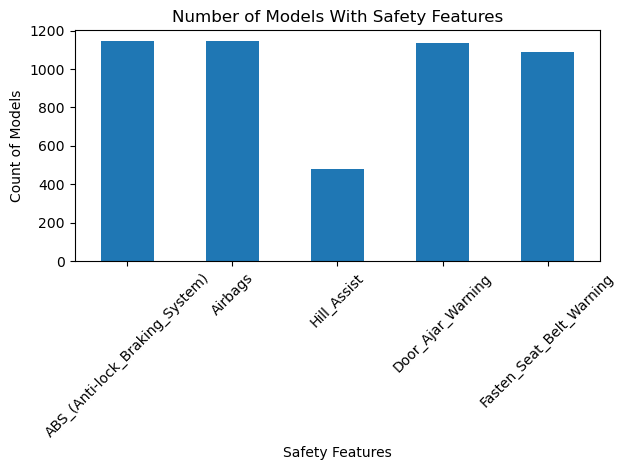

In [12]:
# Replace "Not Available" with NaN
safety_features = [
    "ABS_(Anti-lock_Braking_System)",
    "Airbags",
    "Hill_Assist",
    "Door_Ajar_Warning",
    "Fasten_Seat_Belt_Warning"
]

df[safety_features] = df[safety_features].replace("Not Available", pd.NA)

# Count how many models have the feature
feature_counts = {}
for feature in safety_features:
    count = df[feature].notna().sum()
    feature_counts[feature] = count

# Convert to DataFrame
feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Models_With_Feature'])

# Plotting
feature_df.plot(kind='bar', legend=False)
plt.title("Number of Models With Safety Features")
plt.ylabel("Count of Models")
plt.xlabel("Safety Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2 : User Comfort Exploration

In [45]:
# Replace 'Not Available' with NaN
comfort_features = ['Central_Locking', 'Child_Safety_Locks']
df[comfort_features] = df[comfort_features].replace('Not Available', pd.NA)

# Ensure Seating_Capacity is numeric
df['Seating_Capacity'] = pd.to_numeric(df['Seating_Capacity'], errors='coerce')

# Create pivot table
comfort_summary = pd.pivot_table(
    df,
    index='Model',
    values=['Seating_Capacity', 'Central_Locking', 'Child_Safety_Locks'],
    aggfunc={
        'Seating_Capacity': 'mean',
        'Central_Locking': 'count',
        'Child_Safety_Locks': 'count'
    }
)
# Display 1st 50 record
comfort_summary.sort_values('Seating_Capacity',ascending = False).head(50)


,Central_Locking,Child_Safety_Locks,Seating_Capacity
Model,,,
Winger,0,1,16.000000
Tuv300 Plus,3,3,9.000000
Extreme,0,11,8.454545
Scorpio,9,2,8.111111
Gypsy,0,0,8.000000
Marazzo,8,8,7.500000
Bolero Power Plus,2,5,7.333333
Innova Crysta,16,16,7.312500
Lodgy,6,7,7.285714


### Task 3 : Alert System Analysis

In [50]:
alert_systems = ['High_Speed_Alert_System','Fasten_Seat_Belt_Warning','Door_Ajar_Warning']
df[alert_systems] = df[alert_systems].replace('Not Available',pd.NA)

alert_df = pd.pivot_table(
                            df,
                            index = 'Make',
                            values = ['High_Speed_Alert_System','Fasten_Seat_Belt_Warning','Door_Ajar_Warning'],
                            aggfunc = {
                                        'High_Speed_Alert_System' :  'count',
                                        'Fasten_Seat_Belt_Warning' : 'count',
                                        'Door_Ajar_Warning' : 'count'
                                      }
                         )
# displaying top 50 records
alert_df.head(50)

,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,High_Speed_Alert_System
Make,,,
Aston Martin,3,3,0
Audi,31,31,6
Bajaj,0,0,2
Bentley,6,6,0
Bmw,36,37,13
Bugatti,2,2,2
Datsun,0,9,0
Dc,1,1,0
Ferrari,8,8,0


### Task 4 : Dimensional Analysis

In [59]:
dim_piv = pd.pivot_table(
                            df,
                            index = 'Make',
                            values = ['Height_mm','Length_mm','Width_mm'],
                            aggfunc = {
                                'Height_mm' : 'mean',
                                'Length_mm' : 'mean',
                                'Width_mm' : 'mean'
                            }
                        )
dim_piv.sort_values('Width_mm').head(20)

,Height_mm,Length_mm,Width_mm
Make,,,
Bajaj,1652.000000,2752.000000,1312.000000
Premier,1730.000000,3970.000000,1570.000000
Datsun,1520.600000,3644.400000,1605.600000
Maruti Suzuki R,1671.071429,3655.000000,1623.928571
Maruti Suzuki,1563.859060,3898.926174,1661.644295
Fiat,1517.739130,4195.086957,1708.565217
Volkswagen,1482.117647,4223.823529,1713.882353
Renault,1612.833333,4121.361111,1717.000000
Lexus,1586.000000,4525.464000,1718.684000


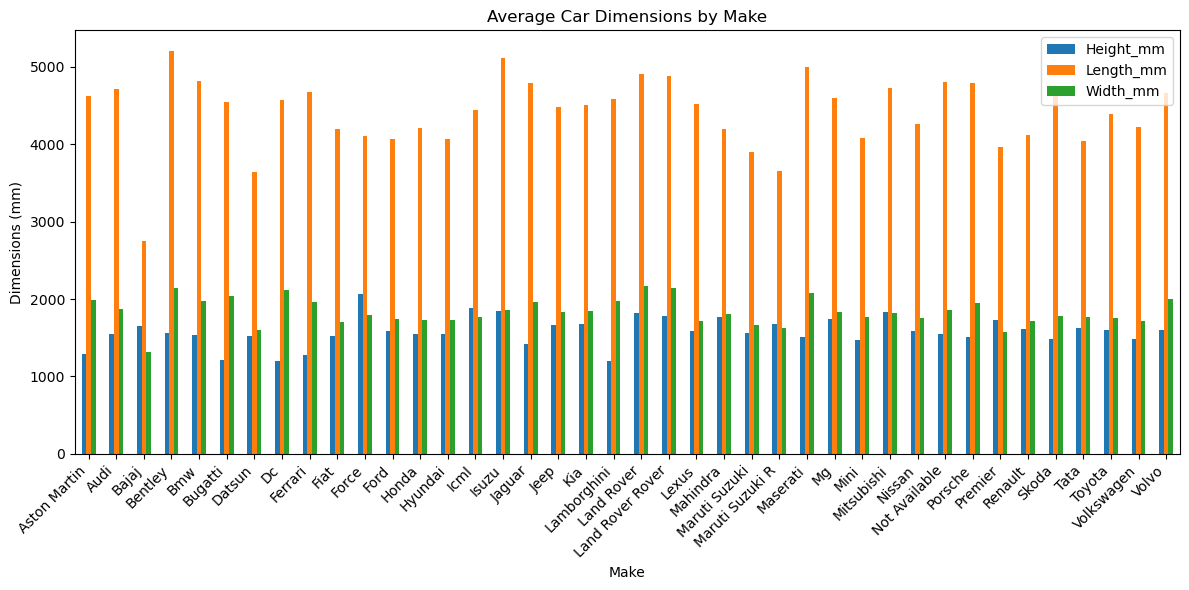

In [62]:
dim_piv.plot(kind='bar', figsize=(12, 6))

plt.title('Average Car Dimensions by Make')
plt.xlabel('Make')
plt.ylabel('Dimensions (mm)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [63]:
'''Part 1: Data Cleaning and Exploration'''

'''Key Interpretations:'''

'''Data Cleaning:'''

# Removed null and duplicate values.

# Standardized formats and handled outliers.

# Ensured data types were appropriate for analysis.

'''Descriptive Statistics:'''

# Brands like Hyundai, Maruti, and Mahindra had the highest number of car models.

# Features like City Mileage, Highway Mileage, Engine Displacement, and Torque were major differentiators.

# Wide variation in car specifications, indicating segmentation into budget, mid-range, and premium categories.

'''Missing Values:'''

#Features such as Drive Modes, Hill Assist, and City Mileage had a significant number of missing values, especially in older or basic models.

'Missing Values:'

In [64]:
'''Part 2: Advanced Analysis and Visualization'''

'''Key Interpretations:'''

'''Feature Relationships:'''

# Strong correlation between Displacement and Power/Torque.

# City Mileage negatively correlated with Kerb Weight — heavier cars gave lower mileage.

'''Visual Insights:'''

# Fuel Type vs. Mileage: Petrol cars generally had better city mileage; Diesel cars performed better on highways.

# Body Type vs. Features: SUVs and Sedans had more advanced features like Hill Assist, while hatchbacks had basic safety features.

'''Top Performers:'''

# Cars from Toyota and Hyundai showed a balance between mileage, power, and safety.

# Tata Nexon and Hyundai Creta had competitive specs in the mid-range market.

'''Customer Centric Analysis:'''

# Customers looking for mileage prioritize lightweight hatchbacks.

# Safety-conscious customers should look for features like Central Locking, Child Safety Locks, and Hill Assist.

'Customer Centric Analysis:'

In [65]:
'''Final Business Conclusions'''

'''Segmentation Opportunity:'''

# The automotive market is clearly segmented into Budget, Family, and Premium vehicles.

# Marketing and sales strategies should target these segments distinctly.

'''Fuel Efficiency Trends:'''

# With rising fuel prices, fuel efficiency remains a top priority — brands should highlight this in advertising.

'''Feature-Driven Purchase:'''

# Safety and comfort features significantly influence purchasing decisions in the mid- and premium-segment.

'''Brand Strength:'''

# Hyundai, Maruti, and Mahindra lead the volume game, but Toyota and Honda provide high feature-value combinations.

'Brand Strength:'

In [66]:
'''Challenges Faced'''

# Missing Data: A considerable number of missing values in important columns like mileage and drive modes.

# Unstructured Variants: Standardizing variant names for analysis was tedious due to inconsistent naming.

# Feature Extraction: Deriving numeric values from text-heavy fields like power and torque required cleaning and parsing.

'Challenges Faced'

In [67]:
'''Future Scope of the Project'''

'''Predictive Modeling:'''

# Build machine learning models to predict car price or customer preferences based on specs.

'''Sentiment Analysis:'''

# Integrate customer reviews to analyze sentiment and correlate with features.

'''Time-Based Analysis:'''

# Add time series data to see how models improved over the years.

'''Interactive Dashboards:'''

# Deploy visualizations on tools like Power BI or Tableau for real-time exploration.

'Interactive Dashboards:'